In [225]:
import sympy as sp
import numpy as np
import math
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt

# EDO

### Metodo de Taylor y minimos cuadrados

Dado el problema de valor inicial
$$y'=\frac{2}{t}y+t^2e^t,\, 1\leq t\leq2,\, y(1)=0,$$
con solución exacta $y(t)=t^2(e^t-e)$:



1.   Encuentre $n$ para el método de Taylor tal que el error absoluto sea del orden de $10^{-6}$. Use $h=0.1$
2.   Use los valores generados en el inciso anterior para el $n$ encontrado y una aproximación de la forma $be^{ax}$ por mínimos cuadrados para aproximar $y$ en los siguientes valores, compare con los valores reales de $y$.

  *   $y(1.04)$
  *   $y(1.55)$
  *   $y(1.97)$

In [226]:
def derivadas(equation, variable, orden):
    derivada = [equation]  # Inicializa la lista de derivada con la ecuación original

    for _ in range(1, orden):  # Itera desde 1 hasta el número de derivada deseado - 1
        derivative = sp.diff(derivada[-1], variable)  # Calcula la derivada de la última ecuación en la lista
        derivative_subs = derivative.subs(sp.diff(y, variable), equation)  # Sustituye la derivada de y en la ecuación calculada
        derivada.append(derivative_subs)  # Añade la derivada sustituida a la lista de derivada
        
    return derivada 


def taylor_method(derivadas, wi, t0, h, n, orden):
    # Convertimos las funciones de las derivadas en funciones lambda que podemos evaluar
    derivative_funcs = [sp.lambdify((t, y), d) for d in derivadas]

    # Inicializamos una lista vacía para almacenar los valores de y en cada iteración
    wi_values = list()

    # Realizamos n iteraciones
    for _ in range(n):
        # Inicializamos el incremento en y para esta iteración
        wi_increment = 0
        # Calculamos cada término de la serie de Taylor y los sumamos para obtener el incremento en y
        for i in range(orden):
            wi_increment += h**(i+1) / sp.factorial(i+1) * derivative_funcs[i](t0, wi)
        # Actualizamos el valor de y y t para la siguiente iteración
        wi += wi_increment
        t0 += h
        
        wi_values.append(wi)
        
    return wi_values

#### punto 1

In [227]:
t = sp.Symbol('t')
y = sp.Function('y')(t)

w0 = 0  
t0 = 1  
h = 0.1  
tf = 2
n = int((tf - t0) / h) 

dydt = (2/t) * y + t**2 * sp.exp(t)  
orden = 5

derivatives_list = derivadas(dydt, t, orden)

approximate_wi = taylor_method(derivatives_list, w0, t0, h, n, orden)

print("valores teoricos")
for i in approximate_wi:
    print(i)

valores teoricos
0.345919711073756
0.866642149992725
1.60721441002734
2.62035853075637
3.96766484293587
5.72095955566921
7.96387089122865
10.7936213478892
14.3230773756282
18.6830919386253


In [228]:
def y_exact(t):
    return t**2 * (math.exp(t) - math.exp(1))

t_values = np.linspace(t0,tf,n+1)[1:]

y_exact_values = [y_exact(t) for t in t_values]

print("valores reales")
for i in y_exact_values:
    print(i)

valores reales
0.3459198765397399
0.866642535759603
1.607215078180737
2.6203595512358335
3.9676662942277936
5.72096152559634
7.963873477844971
10.793624660490641
14.323081535891006
18.683097081886423


#### punto 2

In [229]:
t_array = np.array(t_values)
y_array = np.array(approximate_wi, dtype=float)

# Aplicamos logaritmo natural a los valores de y
y_log = np.log(y_array)

# Construimos la matriz A y el vector b para el sistema lineal Ax = b
A = np.zeros((len(t_array), 2))
A[:, 0] = t_array
A[:, 1] = 1

print("vector A")
print(A)

b_vector = y_log

print("vector b")
print(b_vector)

vector A
[[1.1 1. ]
 [1.2 1. ]
 [1.3 1. ]
 [1.4 1. ]
 [1.5 1. ]
 [1.6 1. ]
 [1.7 1. ]
 [1.8 1. ]
 [1.9 1. ]
 [2.  1. ]]
vector b
[-1.06154858 -0.14312913  0.4745025   0.96331115  1.37817772  1.74413655
  2.07491517  2.37895534  2.66187204  2.92761894]


In [230]:
# resolvemos el sistema de ecuaciones
x = np.linalg.inv(A.T@A)@A.T@b_vector

print("constantes hallados:")
print("a")
a = x[0]
print(a)

print("ln_b")
ln_b = x[1]
print(ln_b)

constantes hallados:
a
4.16730612065398
ln_b
-5.1194433165475495


In [231]:
# Obtenemos b a partir de ln_b
b = np.exp(ln_b)

# Definimos la función aproximada
def y_approx(t):
    return b * np.exp(a * t)

# Evaluamos y_approx en los puntos solicitados
t_values_to_evaluate = [1.04, 1.55, 1.97]
y_approx_values = [y_approx(t) for t in t_values_to_evaluate]
y_exact_values_to_evaluate = [y_exact(t) for t in t_values_to_evaluate]

print("Valores aproximados:")
for i, val in enumerate(y_approx_values):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nValores exactos:")
for i, val in enumerate(y_exact_values_to_evaluate):
    print(f"y({t_values_to_evaluate[i]}) = {val}")

print("\nErrores absolutos:")
for i in range(len(y_approx_values)):
    error = abs(y_approx_values[i] - y_exact_values_to_evaluate[i])
    print(f"Error en t = {t_values_to_evaluate[i]}: {error}")

Valores aproximados:
y(1.04) = 0.45591679598238766
y(1.55) = 3.8185897171689778
y(1.97) = 21.9803690948926

Valores exactos:
y(1.04) = 0.11998749706134393
y(1.55) = 4.788635020801403
y(1.97) = 17.279298435557664

Errores absolutos:
Error en t = 1.04: 0.33592929892104373
Error en t = 1.55: 0.9700453036324248
Error en t = 1.97: 4.701070659334935


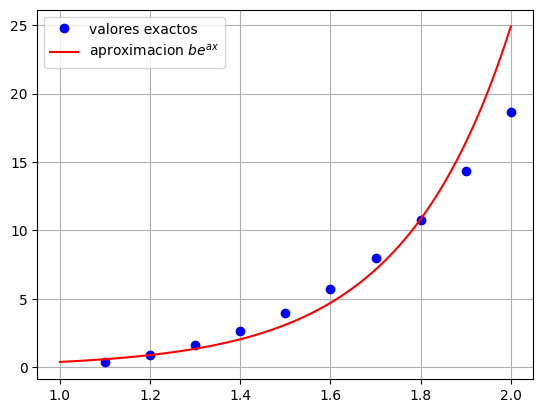

In [234]:
plt.plot(t_values, y_exact_values, 'bo', label = "valores exactos")
t_points = np.linspace(1,2,200)
y = [y_approx(t) for t in t_points]
plt.plot(t, y, color='r', label = "aproximacion $be^{ax}$",)
plt.grid(True)
plt.legend()
plt.show()

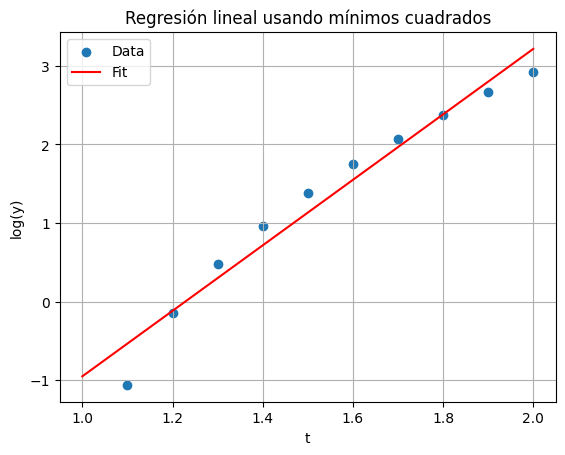

In [233]:
# Calculamos los valores de ln y para los puntos de la aproximación
y_log_approx = [np.log(y) for y in y_exact_values]

# Evaluar la función lineal en el rango de t
linear_range = [ln_b + a * t for t in t_points]

# Crear el gráfico
plt.scatter(t_array, y_log, label='Data')  # Puntos de datos originales
plt.plot(t_range, linear_range, color='red', label='Fit')  # Linea de regresión
plt.title('Regresión lineal usando mínimos cuadrados')
plt.xlabel('t')
plt.ylabel('log(y)')
plt.legend()
plt.grid(True)
plt.show()